In [1]:
import numpy as np
import pandas as pd

In [2]:
# Definindo as funções de ativação e suas derivadas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0) * 1

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [3]:
# Inicialização dos pesos e bias
def initialize_weights(n_inputs, n_hidden, n_output, use_bias):
    W1 = np.random.randn(n_hidden, n_inputs)
    W2 = np.random.randn(n_output, n_hidden)
    b1 = np.random.randn(n_hidden, 1) if use_bias else np.zeros((n_hidden, 1))
    b2 = np.random.randn(n_output, 1) if use_bias else np.zeros((n_output, 1))
    return W1, W2, b1, b2

# Propagação para frente
def forward_pass(X, W1, W2, b1, b2, activation_func):
    Z1 = np.dot(W1, X) + b1
    A1 = activation_func(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = activation_func(Z2)
    return Z1, A1, Z2, A2

# Propagação para trás (backpropagation)
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, activation_func_derivative, learning_rate):
    m = Y.shape[1]  # Number of examples
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * activation_func_derivative(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Update the weights and bias
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    
    return W1, W2, b1, b2

# Função para criar os dados de treinamento para as funções lógicas
def create_data(function, n_inputs):
    X = np.array(np.meshgrid(*[[0, 1]] * n_inputs)).T.reshape(-1, n_inputs).T
    if function == 'and':
        Y = (np.sum(X, axis=0) == n_inputs).astype(int)
    elif function == 'or':
        Y = (np.sum(X, axis=0) > 0).astype(int)
    elif function == 'xor':
        Y = np.bitwise_xor.reduce(X, axis=0)
    else:
        raise ValueError("Invalid logical function")
    return X, Y.reshape(1, -1)

# Função para treinar a rede
def train_network(function, n_inputs, activation, learning_rate, use_bias, epochs, n_hidden):
    # Creating training data
    X, Y = create_data(function, n_inputs)
    
    # Initialize weights and biases
    W1, W2, b1, b2 = initialize_weights(n_inputs, n_hidden, 1, use_bias)
    
    # Select activation function and its derivative
    if activation == 'sigmoid':
        activation_func = sigmoid
        activation_func_derivative = sigmoid_derivative
    elif activation == 'relu':
        activation_func = relu
        activation_func_derivative = relu_derivative
    elif activation == 'tanh':
        activation_func = tanh
        activation_func_derivative = tanh_derivative
    else:
        raise ValueError("Invalid activation function")
    
    # Training loop
    for _ in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X, W1, W2, b1, b2, activation_func)
        W1, W2, b1, b2 = backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, activation_func_derivative, learning_rate)
    
    # Forward pass after training
    _, _, _, A2 = forward_pass(X, W1, W2, b1, b2, activation_func)
    predictions = A2 > 0.5
    accuracy = np.mean(predictions == Y)
    
    return predictions, accuracy

In [4]:
def perform_experiments(functions, n_inputs_list, activations, learning_rates, use_bias_list, n_hidden_list, epochs_list):
    # Lista para armazenar os resultados
    results_list = []

    for function in functions:
        for n_inputs in n_inputs_list:
            for activation in activations:
                for learning_rate in learning_rates:
                    for use_bias in use_bias_list:
                        for n_hidden in n_hidden_list:
                            for epochs in epochs_list:
                                predictions, accuracy = train_network(
                                    function, n_inputs, activation, learning_rate, use_bias, epochs, n_hidden
                                )
                                # Convert predictions from boolean to integer
                                predictions_numeric = predictions.astype(int)
                                # Retrieve expected values for the logical function
                                _, expected = create_data(function, n_inputs)
                                # Append the experiment details and accuracy to the results list
                                results_list.append([
                                    function.upper(), n_inputs, activation, learning_rate,
                                    use_bias, n_hidden, epochs, expected, predictions_numeric, accuracy
                                ])
    
    # Convert the results list to a NumPy array for better manipulation and visualization
    results_np_matrix = np.array(results_list, dtype=object)
    column_names = ["Op", "n_inputs", "activation", "learning_rate", "bias", "n_hidden", "epochs", "expected", "predicted", "accuracy"]
    df = pd.DataFrame(results_np_matrix, columns=column_names)
    # Return the NumPy matrix
    return df

In [5]:
# Configurações dos experimentos
functions = ['and', 'or', 'xor']
n_inputs_list = [3]
activations = ['sigmoid', 'relu', 'tanh']
learning_rates = [0.1, 1]
use_bias_list = [True, False]
n_hidden_list = [2, 4]
epochs_list = [1000, 10000]

results = perform_experiments(
    functions=functions, n_inputs_list=n_inputs_list, activations=activations,
    learning_rates=learning_rates, use_bias_list=use_bias_list, n_hidden_list=n_hidden_list,
    epochs_list=epochs_list
)

results

,Op,n_inputs,activation,learning_rate,bias,n_hidden,epochs,expected,predicted,accuracy
0,AND,3,sigmoid,0.1,True,2,1000,"[[0, 0, 0, 0, 0, 0, 0, 1]]","[[0, 0, 0, 0, 0, 0, 0, 0]]",0.875
1,AND,3,sigmoid,0.1,True,2,10000,"[[0, 0, 0, 0, 0, 0, 0, 1]]","[[0, 0, 0, 0, 0, 0, 0, 1]]",1.0
2,AND,3,sigmoid,0.1,True,4,1000,"[[0, 0, 0, 0, 0, 0, 0, 1]]","[[0, 0, 0, 0, 0, 0, 0, 0]]",0.875
3,AND,3,sigmoid,0.1,True,4,10000,"[[0, 0, 0, 0, 0, 0, 0, 1]]","[[0, 0, 0, 0, 0, 0, 0, 1]]",1.0
4,AND,3,sigmoid,0.1,False,2,1000,"[[0, 0, 0, 0, 0, 0, 0, 1]]","[[0, 0, 0, 0, 0, 0, 0, 0]]",0.875
...,...,...,...,...,...,...,...,...,...,...
139,XOR,3,tanh,1,True,4,10000,"[[0, 1, 1, 0, 1, 0, 0, 1]]","[[0, 1, 1, 0, 1, 0, 0, 1]]",1.0
140,XOR,3,tanh,1,False,2,1000,"[[0, 1, 1, 0, 1, 0, 0, 1]]","[[0, 1, 1, 0, 1, 0, 0, 0]]",0.875
141,XOR,3,tanh,1,False,2,10000,"[[0, 1, 1, 0, 1, 0, 0, 1]]","[[0, 1, 1, 0, 1, 0, 0, 1]]",1.0
142,XOR,3,tanh,1,False,4,1000,"[[0, 1, 1, 0, 1, 0, 0, 1]]","[[0, 1, 1, 0, 1, 0, 0, 1]]",1.0


In [6]:
# Função para calcular a média da acurácia por fator
def calculate_accuracy_improvement(df, factor):
    return df.groupby(factor)['accuracy'].mean()

# Calculando a média da acurácia por cada fator
accuracy_by_op = calculate_accuracy_improvement(results, 'Op')
accuracy_by_activation = calculate_accuracy_improvement(results, 'activation')
accuracy_by_learning_rate = calculate_accuracy_improvement(results, 'learning_rate')
accuracy_by_bias = calculate_accuracy_improvement(results, 'bias')
accuracy_by_n_hidden = calculate_accuracy_improvement(results, 'n_hidden')
accuracy_by_epochs = calculate_accuracy_improvement(results, 'epochs')

# Imprimindo os resultados
print(accuracy_by_op)
print()
print(accuracy_by_activation)
print()
print(accuracy_by_learning_rate)
print()
print(accuracy_by_bias)
print()
print(accuracy_by_n_hidden)
print()
print(accuracy_by_epochs)

Op
AND    0.966146
OR      0.96875
XOR    0.794271
Name: accuracy, dtype: object

activation
relu       0.859375
sigmoid    0.914062
tanh       0.955729
Name: accuracy, dtype: object

learning_rate
0.1    0.890625
1.0    0.928819
Name: accuracy, dtype: object

bias
False    0.923611
True     0.895833
Name: accuracy, dtype: object

n_hidden
2    0.881944
4      0.9375
Name: accuracy, dtype: object

epochs
1000     0.885417
10000    0.934028
Name: accuracy, dtype: object


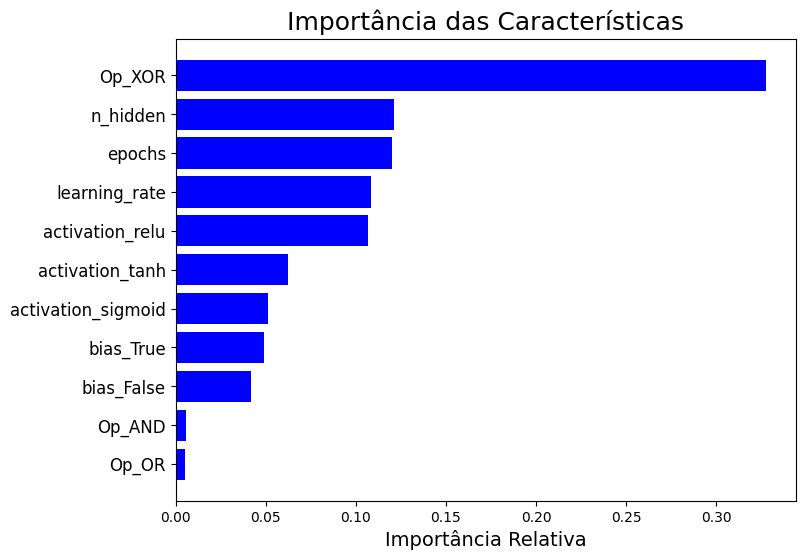

In [7]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Para a regressão linear, precisamos de valores numéricos para todas as variáveis, então vamos converter as categóricas em dummies
results_trainable = pd.get_dummies(results, columns=['Op', 'activation', 'bias'])

# Definindo a variável dependente (y) e independentes (X)
X = results_trainable.drop(['accuracy', 'expected', 'predicted', 'n_inputs'], axis=1).replace({False: 0, True: 1}).astype('float64')
y = results_trainable['accuracy'].astype('float64')

# Treinar o modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Obter importâncias das variáveis
importances = rf.feature_importances_
# Índices ordenados das importâncias
indices = np.argsort(importances)

# Nome das características em ordem de importância
feature_names = X.columns.tolist()
sorted_feature_names = [feature_names[i] for i in indices]

# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.title("Importância das Características", fontsize=18)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), sorted_feature_names, fontsize=12)
plt.xlabel('Importância Relativa', fontsize=14)
plt.show()